In [748]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [749]:
# 폰트설정
plt.rc("font", family='Malgun Gothic')

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

Seborn 라이브러리 내 포함된 'titanic' 데이터셋을 참고하여 문제를 해결하세요.

In [750]:
titanic = sns.load_dataset('titanic')

## 승객의 생존 여부별로 각각의 수를 막대 그래프로 나타내세요.

In [751]:
survival_count = titanic['survived'].value_counts()
survival_count

survived
0    549
1    342
Name: count, dtype: int64

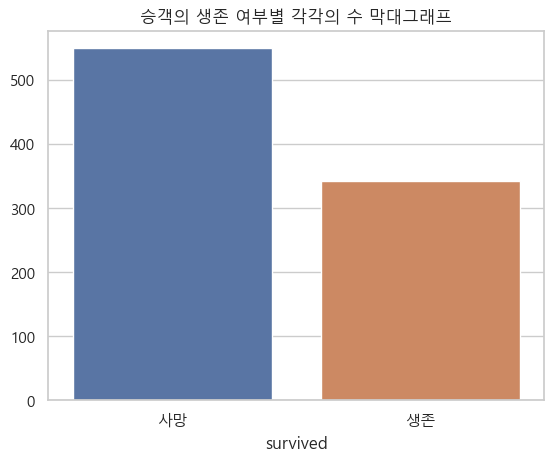

In [752]:
sns.barplot(x=survival_count.index, y=survival_count.values, estimator='sum')
plt.title('승객의 생존 여부별 각각의 수 막대그래프')
plt.xticks(ticks=[0, 1], labels=['사망', '생존'])
plt.show()

## 승객들의 연령 분포를 히스토그램으로 표시하세요.

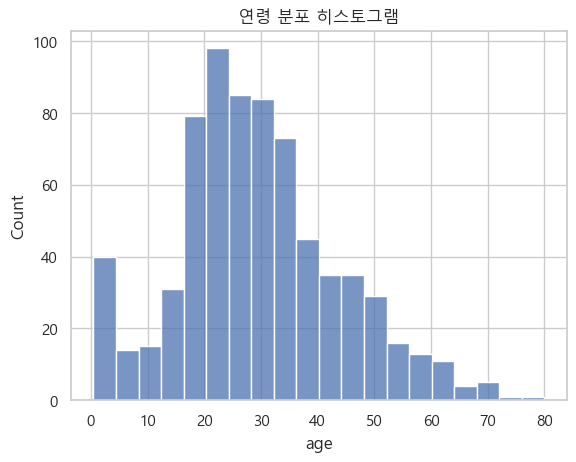

In [753]:
sns.histplot(data=titanic, x='age')
plt.title('연령 분포 히스토그램')
plt.show()

## 연령대별 생존자 수의 변화를 선 그래프로 나타내세요.

In [754]:
age_survived = titanic.groupby('age')['survived'].sum().reset_index()

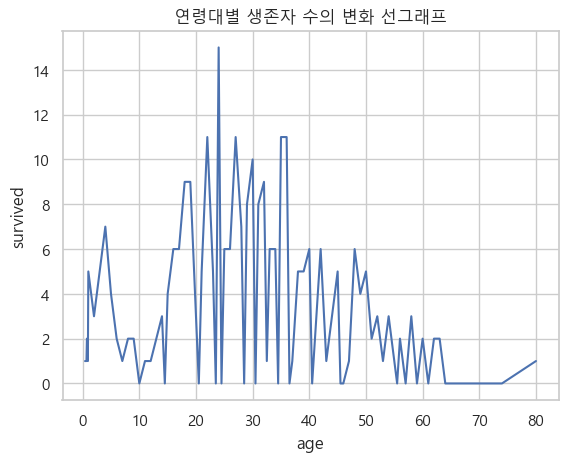

In [755]:
sns.lineplot(age_survived, x='age', y='survived')
plt.title('연령대별 생존자 수의 변화 선그래프')
plt.show()

## 승객의 연령과 요금을 축으로 하는 스캐터 플롯을 그리고, 생존 여부에 따라 색상을 달리하세요.

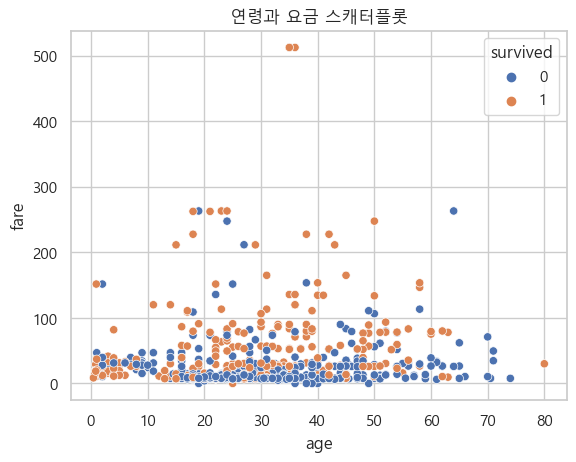

In [756]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived')
plt.title('연령과 요금 스캐터플롯')
plt.show()

## 각 클래스별 승객의 연령 분포를 박스 플롯으로 나타내세요.

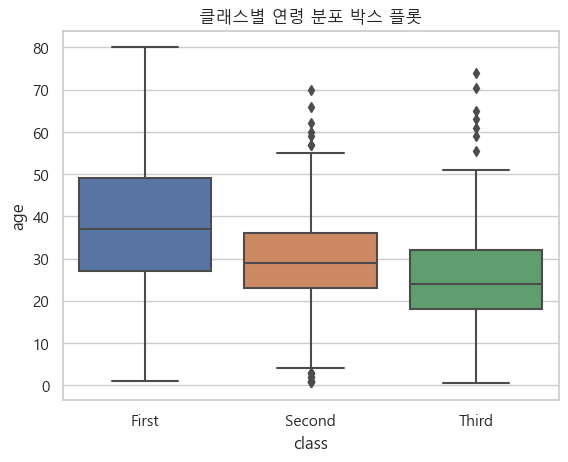

In [757]:
sns.boxplot(titanic, x='class', y='age')
plt.title('클래스별 연령 분포 박스 플롯')
plt.show()

## 각 클래스별 승객 수를 도넛 차트로 시각화하세요.

In [758]:
count = titanic['class'].value_counts()
count

class
Third     491
First     216
Second    184
Name: count, dtype: int64

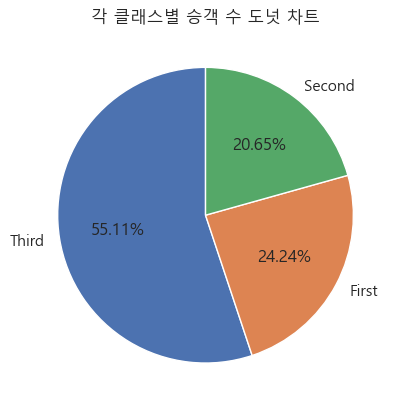

In [759]:
plt.pie(count,
        labels=count.index,
        autopct='%1.2f%%',
        startangle=90,
        )
plt.title('각 클래스별 승객 수 도넛 차트')
plt.show()

## 각 클래스에서의 생존자와 사망자 수를 스택드 바 차트로 나타내세요.

In [760]:
class_survived = titanic.groupby(['class', 'survived']).size().unstack()

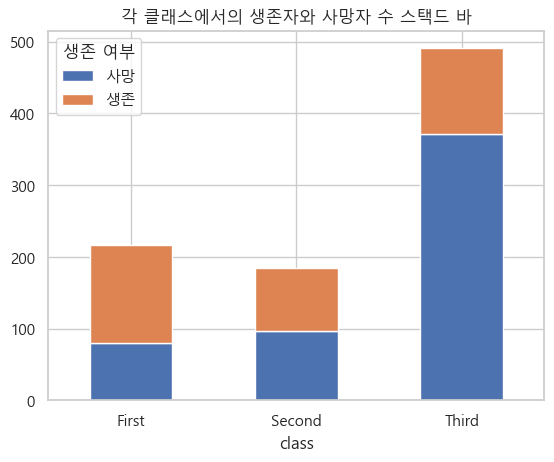

In [761]:
class_survived.plot(kind='bar', stacked=True)
plt.title('각 클래스에서의 생존자와 사망자 수 스택드 바')
plt.xticks(rotation=0)
plt.legend(title='생존 여부', labels=['사망', '생존'])
plt.show()

## 연령대, 요금, 생존 여부를 이용하여 버블 차트를 만드세요. 각 버블의 크기는 승객 수에 따라 다르게 하세요.

In [762]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [763]:
bubble_data = titanic.groupby(['age', 'survived'])['fare'].agg(['mean', 'count']).reset_index()

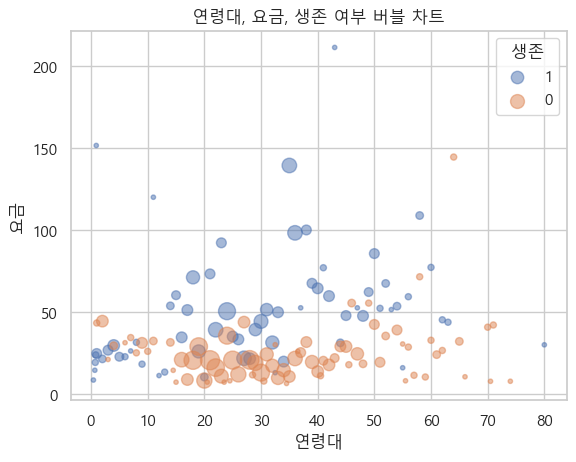

In [764]:
for survived in bubble_data['survived'].unique():
    subset = bubble_data[bubble_data['survived'] == survived]
    plt.scatter(subset['age'], subset['mean'], s=subset['count']*10, alpha=0.5, label=survived)

plt.xlabel('연령대')
plt.ylabel('요금')
plt.title('연령대, 요금, 생존 여부 버블 차트')
plt.legend(title='생존')
plt.show()

## 탑승, 항구별 승객 분포를 파이 차트로 나타내세요.

In [765]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


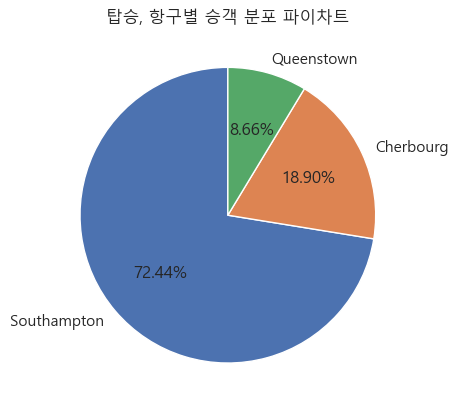

In [766]:
plt.pie(titanic['embark_town'].value_counts(),
        labels=titanic['embark_town'].value_counts().index,
        autopct='%1.2f%%',
        startangle=90)
plt.title('탑승, 항구별 승객 분포 파이차트')
plt.show()

## 클래스별, 성별 생존율을 히트맵으로 시각화하세요.

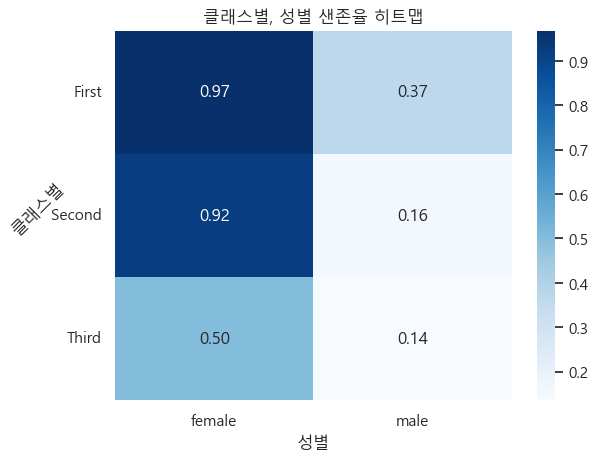

In [767]:
# 클래스별, 성별 생존율 계산
survival_rate = titanic.groupby(['class', 'sex'])['survived'].mean().unstack()
sns.heatmap(survival_rate, annot=True, fmt=".2f", cmap="Blues")
plt.title('클래스별, 성별 샌존율 히트맵')
plt.yticks(rotation=0)
plt.xlabel('성별')
plt.ylabel('클래스별', rotation=45)
plt.show()

## 연령, 클래스, 요금, 생존 여부를 포함하여 다변량 데이터 관계를 페어플롯으로 나타내세요.

In [768]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [769]:
titanic['class'] = titanic['class'].astype(str)

In [770]:
titanic['class'] = titanic['class'].map({'First': 1, 'Second': 2, 'Third': 3})

In [771]:
titanic[['class', 'survived']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   class     891 non-null    int64
 1   survived  891 non-null    int64
dtypes: int64(2)
memory usage: 14.1 KB


D:\kdit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


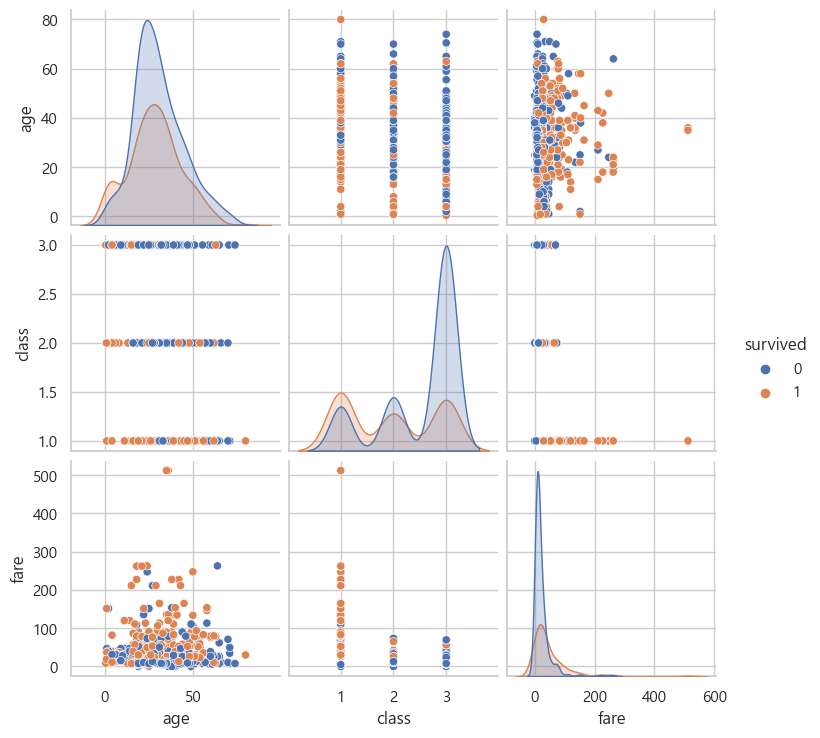

In [772]:
sns.pairplot(titanic, vars=['age', 'class', 'fare'], hue='survived')
plt.show()

## 클래스와 성별에 따른 요금 분포를 바이올린 플롯으로 시각화하세요.

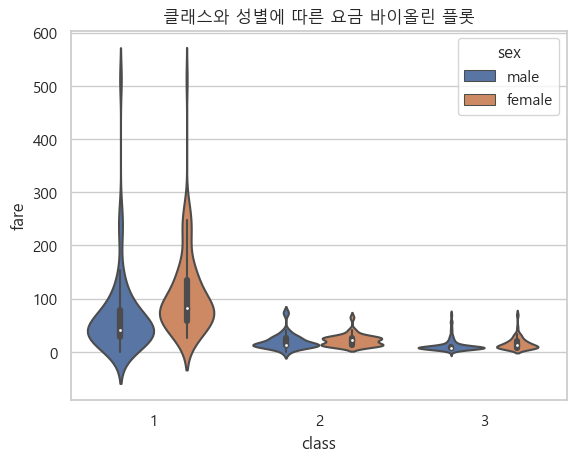

In [773]:
sns.violinplot(titanic, x='class', y='fare', hue='sex')
plt.title('클래스와 성별에 따른 요금 바이올린 플롯')
plt.show()

## 연령대별 평균 요금 변화를 라인 플롯으로 나타내세요.

In [774]:
age_group = titanic.groupby('age')['fare'].mean().reset_index()
age_group

,age,fare
0,0.42,8.5167
1,0.67,14.5000
2,0.75,19.2583
3,0.83,23.8750
4,0.92,151.5500
...,...,...
83,70.00,40.7500
84,70.50,7.7500
85,71.00,42.0792
86,74.00,7.7750


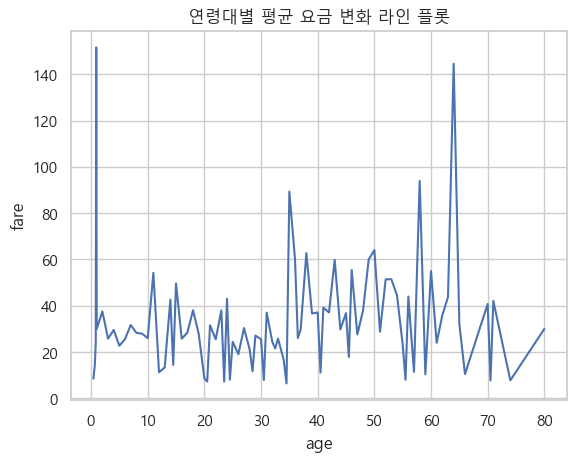

In [775]:
sns.lineplot(data=age_group, x='age', y='fare')
plt.title('연령대별 평균 요금 변화 라인 플롯')
plt.show()

## 서브플롯 활용한 연령대 및 성별 생존율 비교:
- 가. 각 클래스별로 서브플롯을 생성하세요. 각 서브플롯 안에서 남성과 여성 승객의 연령대별 (예: 0-10, 11-20, 21-30 등) 생존율을 바 차트로 비교하세요.
- 나. 이 문제에서는 각 클래스 (1등석, 2등석, 3등석)를 나타내는 세 개의 서브플롯을 만들고, 각 서브플롯 내에서는 성별에 따른 연령대별 생존율을 막대 그래프로 표시합니다. 성별을 색상으로 구분하여 표시하세요.

In [776]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,3,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,1,woman,False,C,Cherbourg,yes,False


In [777]:
titanic['class'].unique()

array([3, 1, 2], dtype=int64)

In [778]:
filt_1 = titanic['class'] == 1
filt_2 = titanic['class'] == 2
filt_3 = titanic['class'] == 3

In [779]:
titanic[filt_1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,1,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,1,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,1,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,1,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,1,man,True,A,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,1,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,1,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,1,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,1,woman,False,B,Southampton,yes,True


In [780]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
titanic['age_group'] = pd.cut(titanic['age'], bins=age_bins)
titanic['age_group']

0      (20.0, 30.0]
1      (30.0, 40.0]
2      (20.0, 30.0]
3      (30.0, 40.0]
4      (30.0, 40.0]
           ...     
886    (20.0, 30.0]
887    (10.0, 20.0]
888             NaN
889    (20.0, 30.0]
890    (30.0, 40.0]
Name: age_group, Length: 891, dtype: category
Categories (8, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

In [781]:
titanic[filt_1].groupby(['sex', 'age_group'])['survived'].mean().reset_index()

,sex,age_group,survived
0,female,"(0, 10]",0.000000
1,female,"(10, 20]",1.000000
2,female,"(20, 30]",0.952381
3,female,"(30, 40]",1.000000
4,female,"(40, 50]",0.923077
5,female,"(50, 60]",1.000000
6,female,"(60, 70]",1.000000
7,female,"(70, 80]",NaN
8,male,"(0, 10]",1.000000
9,male,"(10, 20]",0.400000


In [782]:
survival_rate_1 = titanic[filt_1].groupby(['sex', 'age_group'])['survived'].mean().reset_index()
survival_rate_2 = titanic[filt_2].groupby(['sex', 'age_group'])['survived'].mean().reset_index()
survival_rate_3 = titanic[filt_3].groupby(['sex', 'age_group'])['survived'].mean().reset_index()

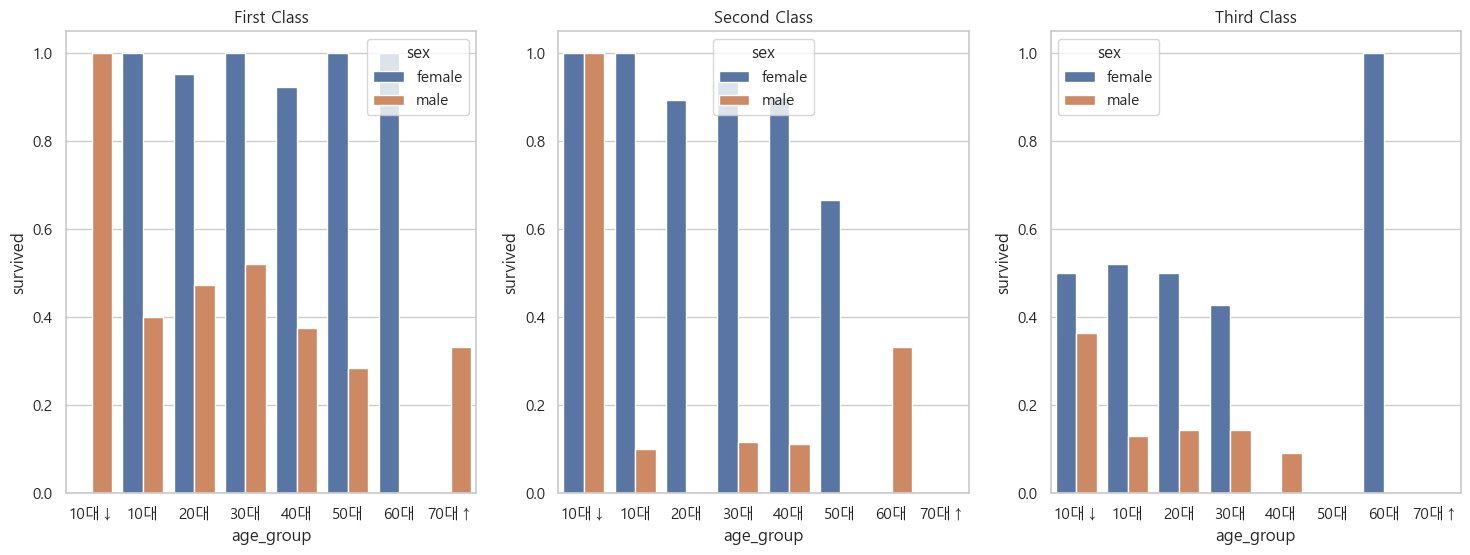

In [783]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=survival_rate_1, x='age_group', y='survived', hue='sex', ax=axes[0])
sns.barplot(data=survival_rate_2, x='age_group', y='survived', hue='sex', ax=axes[1])
sns.barplot(data=survival_rate_3, x='age_group', y='survived', hue='sex', ax=axes[2])

axes[0].set_title('First Class')
axes[1].set_title('Second Class')
axes[2].set_title('Third Class')

x_labels = ['10대↓', '10대', '20대', '30대', '40대', '50대', '60대', '70대↑']
for ax in axes:
    ax.set_xticklabels(x_labels)

plt.show()